In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Task4').getOrCreate()

In [42]:
from pyspark.ml.clustering import KMeans

df = spark.read.csv(r"C:\Users\Yuval\Desktop\DateScience-master\task4.csv", header=True, inferSchema=True)

In [6]:
df.head()

Row(_1=-1.0, _2=-1.0, _3=-1.0, _4=-1.0, _5=-1.0, _6=-1.0, _7=-1.0, _8=-1.0, _9=-1.0, _10=-1.0, _11=-1.0, _12=-1.0, _13=-1.0, _14=-1.0, _15=-1.0, _16=-1.0, _17=-1.0, _18=-1.0, _19=-1.0, _20=-1.0, _21=-1.0, _22=9.47176684881603, _23=10.018214936247723, _24=0.0, _25=-1.0, _26=-1.0, _27=-1.0, _28=-1.0, _29=14.025500910746812, _30=14.025500910746812, _31=14.025500910746812, _32=14.025500910746812, _33=-1.0, _34=-1.0, _35=-1.0, _36=-1.0, _37=-1.0, _38=-1.0, _39=-1.0, _40=-1.0, _41=-1.0, _42=-1.0, _43=-1.0, _44=-1.0, _45=-1.0, _46=-1.0, _47=-1.0, _48=-1.0, _49=24.043715846994534, _50=32.05828779599271, _51=-1.0, _52=-1.0, _53=-1.0, _54=-1.0, _55=-1.0, _56=-1.0, _57=-1.0, _58=51.7304189435337, _59=61.56648451730419, _60=71.5846994535519, _61=-1.0, _62=-1.0, _63=53.916211293260474, _64=-1.0, _65=71.5846994535519, _66=-1.0, _67=32.05828779599271, _68=-1.0, _69=-1.0, _70=-1.0, _71=-1.0, _72=-1.0, _73=-1.0, _74=-1.0, _75=45.90163934426229, _76=-1.0, _77=34.06193078324226, _78=-1.0, _79=47.54098360

In [7]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

feat_cols = ['_' + str(i) for i in range(1, 161)]
vec_assembler = VectorAssembler(inputCols=feat_cols, outputCol='features')
final_data = vec_assembler.transform(df)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [8]:
# Normalize
scalerModel = scaler.fit(final_data)
cluster_final_data = scalerModel.transform(final_data)


kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)

model_k3 = kmeans3.fit(cluster_final_data)
model_k2 = kmeans2.fit(cluster_final_data)

In [11]:
# Run Kmeans
kmeans4 = KMeans(featuresCol='scaledFeatures',k=4)
model_k4 = kmeans4.fit(cluster_final_data)
result_k4 = model_k4.computeCost(cluster_final_data)

print("Errors = "+ str(result_k4))
model_k4.transform(cluster_final_data).groupBy('prediction').count().show()

Errors = 19294.452246135406
+----------+-----+
|prediction|count|
+----------+-----+
|         1|   81|
|         3|   41|
|         2|   27|
|         0|    1|
+----------+-----+



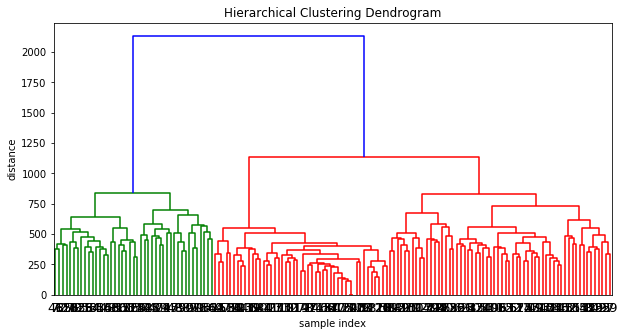

In [44]:
# Graphic represenatation
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

norm_df = df.drop('_161').collect()

Z = linkage(norm_df, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

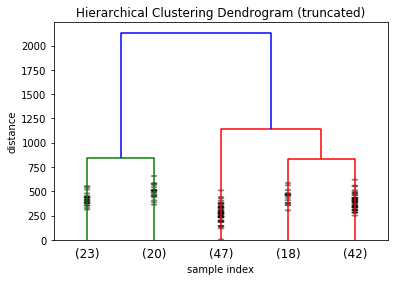

In [46]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
#     show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=0.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

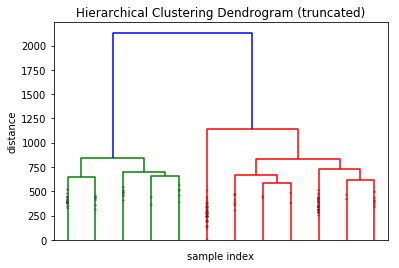

In [47]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()